# Introduction to the dataset

The raw files are in [count/inton_events/](count/inton_events/).
It is basically a bunch of CSV files.
Each file correspond to a assay, and each line of those files correspond
to GENE-INTRON_SITE reading.

Here is a figure describing the filenames:

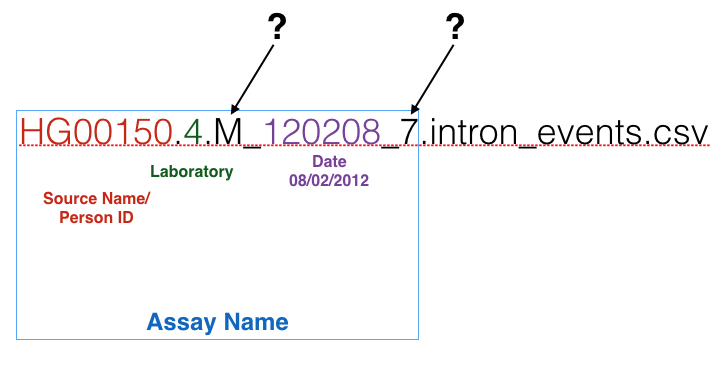

In [1]:
from IPython.display import Image
Image(filename='filename-interpretation.png') 

# How do I load the pre-processed phenotypes?

Quite simple and fast:

In [1]:
%%time

import msgpack
import cPickle as pkl
import blosc

def get_gene_map_intron():
    with open('gene_map_intron_filter2.msg', 'rb') as f:
        return dict(msgpack.unpackb(f.read()))

def load_entire_file():
    with open('intron_events_filter2.pkl.blp', 'rb') as f:
        return pkl.loads(blosc.decompress(f.read()))

gene_map_intron = get_gene_map_intron()
df = load_entire_file()

CPU times: user 742 ms, sys: 523 ms, total: 1.26 s
Wall time: 1.35 s


**gene_map_intron** is a dictionary that maps gene to introns:

In [6]:
gene = gene_map_intron.keys()[1]
print(gene, gene_map_intron[gene])

('ENSG00000064703', [1, 2, 3, 4])


**df** is a Pandas DataFrame:

In [7]:
df.head()

assay  nsuc  ntri
gene            intron                                  
ENSG00000000419 2       HG00096.1.M_111124_6     0   474
                2       HG00097.7.M_120219_2     0   581
                2       HG00099.1.M_120209_6     0   358
                2       HG00099.5.M_120131_3     0   405
                2       HG00100.2.M_111215_8     0   405

## How do I get the traits of a gene-intron pair?

In [11]:
%%time
df.loc[('ENSG00000064703', 3), :].head()

CPU times: user 821 ms, sys: 1 s, total: 1.82 s
Wall time: 1.82 s


assay  nsuc  ntri
gene            intron                                  
ENSG00000064703 3       HG00096.1.M_111124_6     0    85
                3       HG00097.7.M_120219_2     1   193
                3       HG00099.1.M_120209_6     0   119
                3       HG00099.5.M_120131_3     2   148
                3       HG00100.2.M_111215_8     0    88

### Can I have that in a NumPy array?

sure:

In [18]:
%%time
import numpy as np
print(np.asarray(df.loc[('ENSG00000064703', 3), ['nsuc', 'ntri']]))

[[  0  85]
 [  1 193]
 [  0 119]
 ..., 
 [  0  49]
 [  0  92]
 [  0 107]]
CPU times: user 135 ms, sys: 403 ms, total: 538 ms
Wall time: 537 ms
